In [5]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from train import *
import json
import os


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Ali
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=1


dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval,
              num_eval_episodes, max_steps, prob_mask, record_video="K=1-n=1-disc", seeds=[420, 69, 1337])

with open('./lists/agent1/values.json', 'w') as f:
    json.dump(dict_lists, f)

In [ ]:
# Ali
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval,
             num_eval_episodes, max_steps, prob_mask, record_video="K=1-n=1-disc-mask" ,seeds=[420, 69, 1337])

with open('./lists/stoch/values.json', 'w') as f:
    json.dump(dict_lists, f)

In [ ]:
# Ali
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=6
n=1
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval,
              num_eval_episodes, max_steps, prob_mask, record_video="K=6-n=1-disc-prob", seeds=[420, 69, 1337])

with open('./lists/agent2/values.json', 'w') as f:
    json.dump(dict_lists, f)

In [ ]:
# ALi
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=6
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes,
      max_steps, prob_mask, record_video="K=6-n=6-disc-prob", seeds = [420, 69, 1337]) 

with open('./lists/agent3/values.json', 'w') as f:
    json.dump(dict_lists, f)

In [ ]:
# Elias
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=6
n=6
env_name='CartPole-v1'
continous=False
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1

dict_lists = train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes,
      max_steps, prob_mask, record_video="K=6-n=6-disc-prob", seeds = [420, 69, 1337]) 

with open('./lists/agent4/values.json', 'w') as f:
    json.dump(dict_lists, f)

In [ ]:
# Elias
lr_actor=1e-5
lr_critic=1e-3
gamma=0.99
K=1
n=1
env_name='InvertedPendulum-v4'
continous=True
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
dict_lists =train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask, record_video="K=1-n=1-cont-prob", seeds=[420, 69, 1337])

with open('./lists/agent5/values.json', 'w') as f:
    json.dump(dict_lists, f)

In [ ]:
# ELias
lr_actor=3e-4
lr_critic=1e-3
gamma=0.99
K=6
n=6
env_name='InvertedPendulum-v4'
continous=True
log_interval=1000
eval_interval=20000
num_eval_episodes=10
max_steps=500000
prob_mask=0.1
dict_lists=train(lr_actor, lr_critic, gamma, K, n, env_name, continous, log_interval, eval_interval, num_eval_episodes, max_steps, prob_mask, record_video="K=6-n=6-cont-prob-lr", seeds=[420, 69, 1337])

with open('./lists/agent6/values.json', 'w') as f:
    json.dump(dict_lists, f)

In [7]:
disc_agents_dicts = {f: json.load(open("./lists/" + f + "/values.json")) for f in ["agent1", "agent1_stoch", "agent2", "agent3", "agent4"]}
cont_agents_dicts = {f: json.load(open("./lists/" + f + "/values.json")) for f in ["agent5", "agent6"]}


### AGENT 1 

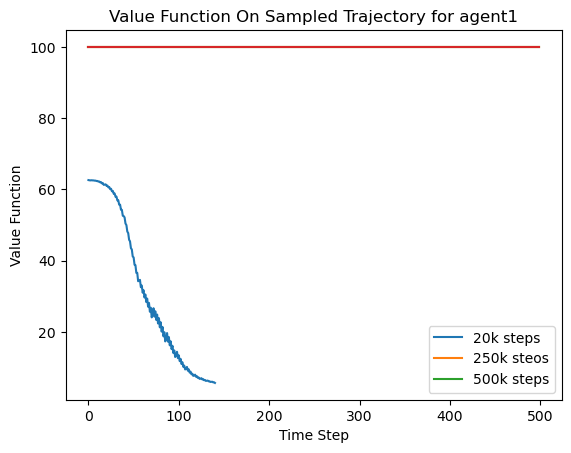

In [8]:
val_traject = disc_agents_dicts["agent1"]["value_funcs_20_100_500"]

for traject in val_traject:
    plt.xlabel('Time Step')
    plt.ylabel('Value Function')
    plt.title('Value Function On Sampled Trajectory for agent1')
    plt.plot(traject)

plt.legend(["20k steps", "250k steos", "500k steps"])

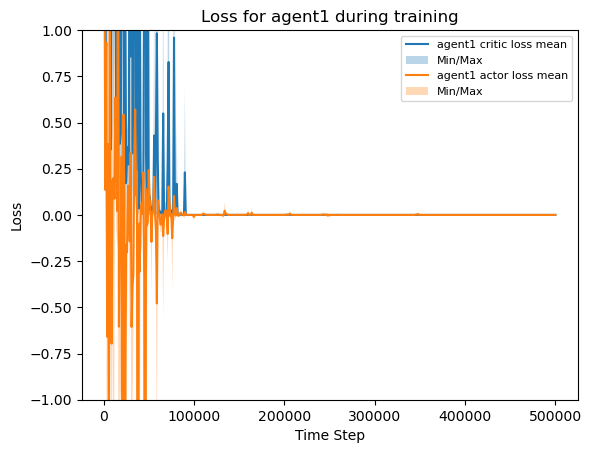

In [9]:
agent1_critic_loss = disc_agents_dicts["agent1"]["train_loss_critic_history_all"]
agent1_actor_loss = disc_agents_dicts["agent1"]["train_loss_actor_history_all"]

mean = np.mean(agent1_critic_loss, axis=0)
min = np.min(agent1_critic_loss, axis=0)
max = np.max(agent1_critic_loss, axis=0)

range_step = 1000
plt.xlabel('Time Step')
plt.ylabel('Loss')
plt.title('Loss for agent1 during training')
plt.ylim(-1,1)
plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= "agent1 critic loss mean")
plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')

mean = np.mean(agent1_actor_loss, axis=0)
min = np.min(agent1_actor_loss, axis=0)
max = np.max(agent1_actor_loss, axis=0)
plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= "agent1 actor loss mean")
plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')

plt.legend(prop={'size': 8})

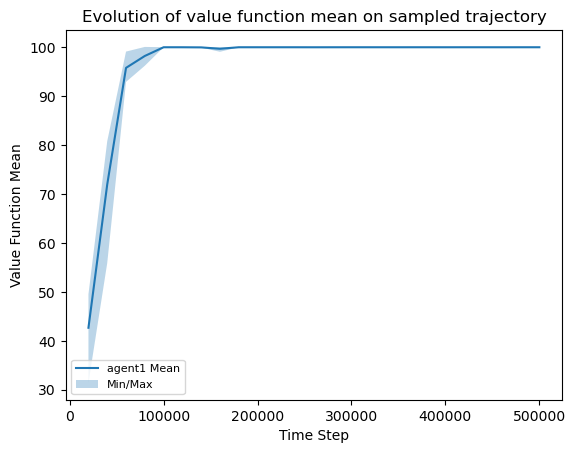

In [10]:
mean = np.mean(np.array(disc_agents_dicts['agent1']['value_trajectories_mean_all']), axis=0)
min = np.min(np.array(disc_agents_dicts['agent1']['value_trajectories_mean_all']), axis=0)
max = np.max(np.array(disc_agents_dicts['agent1']['value_trajectories_mean_all']), axis=0)
range_step = 20000
plt.xlabel('Time Step')
plt.ylabel('Value Function Mean')
plt.title('Evolution of value function mean on sampled trajectory')
plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= 'agent1 Mean')
plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')
plt.legend(prop={'size': 8})

### Rest of dicrete env Agents

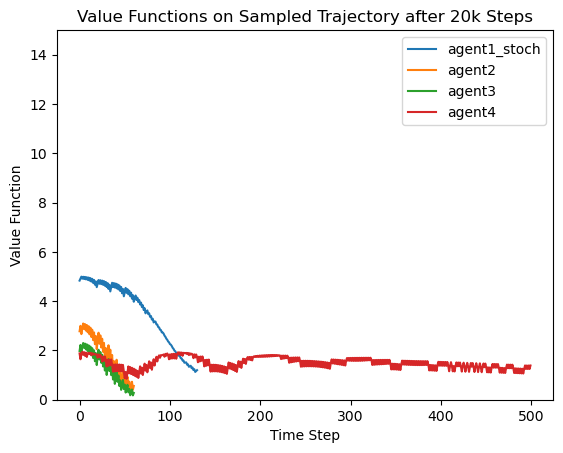

In [11]:
for k,v in disc_agents_dicts.items():
    if k != "agent1":
        trajectory = v["value_funcs_20_100_500"][0]
        plt.plot(trajectory, label = k)
        plt.legend()
        plt.xlabel('Time Step')
        plt.ylabel('Value Function')
        plt.ylim(0, 15)
        plt.title('Value Functions on Sampled Trajectory after 20k Steps')

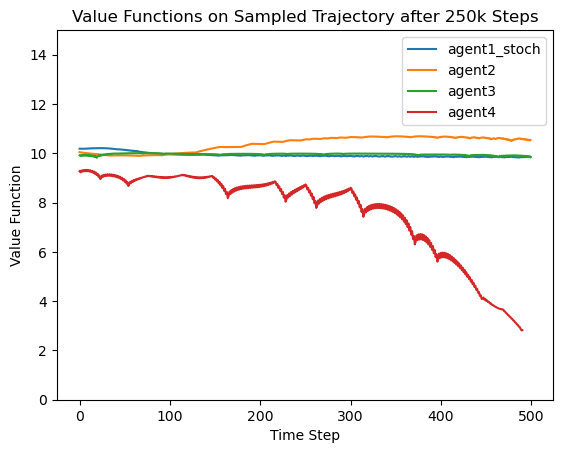

In [12]:
for k,v in disc_agents_dicts.items():
    if k != "agent1":
        trajectory = v["value_funcs_20_100_500"][1]
        plt.plot(trajectory, label = k)
        plt.legend()
        plt.ylim(0, 15)
        plt.xlabel('Time Step')
        plt.ylabel('Value Function')
        plt.title('Value Functions on Sampled Trajectory after 250k Steps')

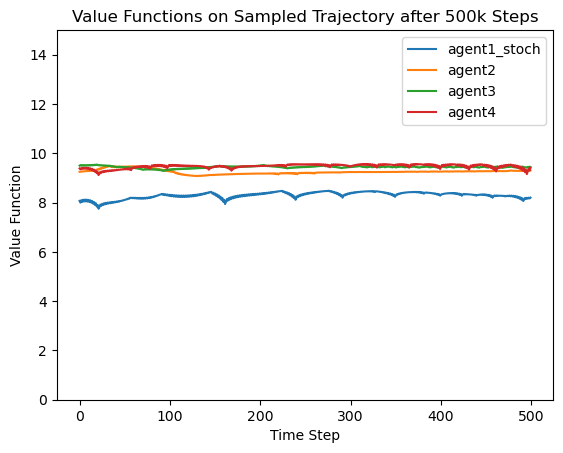

In [13]:
for k,v in disc_agents_dicts.items():
    if k != "agent1":
        trajectory = v["value_funcs_20_100_500"][3]
        plt.plot(trajectory, label = k)
        plt.legend()
        plt.ylim(0, 15)
        plt.xlabel('Time Step')
        plt.ylabel('Value Function')
        plt.title('Value Functions on Sampled Trajectory after 500k Steps')

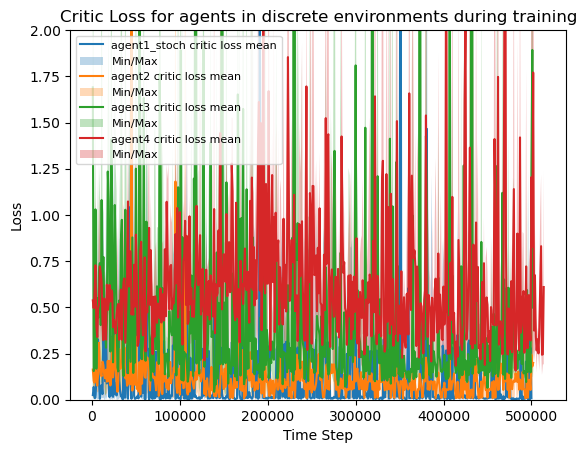

In [14]:
for k,v in disc_agents_dicts.items():
    if k != "agent1":
        agent1_critic_loss = v["train_loss_critic_history_all"]
        mean = np.mean(agent1_critic_loss, axis=0)
        min = np.min(agent1_critic_loss, axis=0)
        max = np.max(agent1_critic_loss, axis=0)
        range_step = 1000
        plt.xlabel('Time Step')
        plt.ylabel('Loss')
        plt.title('Critic Loss for agents in discrete environments during training')
        plt.ylim(0,2)
        plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k +" critic loss mean")
        plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')

plt.legend(prop={'size': 8})

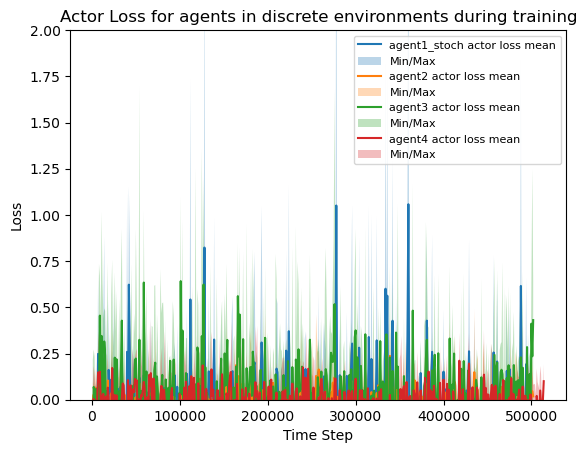

In [15]:
for k,v in disc_agents_dicts.items():
    if k != "agent1":
        agent1_critic_loss = v["train_loss_actor_history_all"]
        mean = np.mean(agent1_critic_loss, axis=0)
        min = np.min(agent1_critic_loss, axis=0)
        max = np.max(agent1_critic_loss, axis=0)
        range_step = 1000
        plt.xlabel('Time Step')
        plt.ylabel('Loss')
        plt.title('Actor Loss for agents in discrete environments during training')
        plt.ylim(0,2)
        plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k +" actor loss mean")
        plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')

plt.legend(prop={'size': 8})

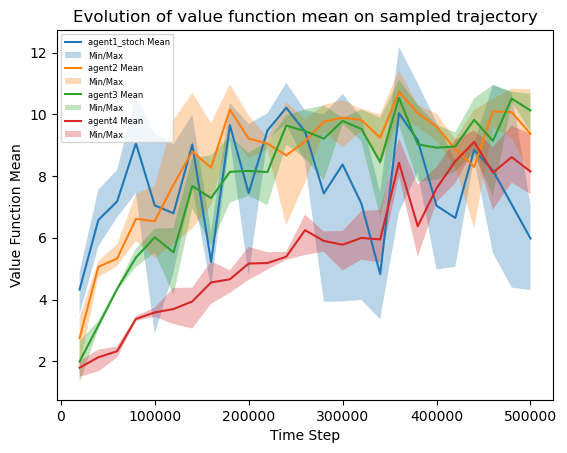

In [16]:
for k,v in disc_agents_dicts.items():
    if k != "agent1":
        mean = np.mean(np.array(v['value_trajectories_mean_all']), axis=0)
        min = np.min(np.array(v['value_trajectories_mean_all']), axis=0)
        max = np.max(np.array(v['value_trajectories_mean_all']), axis=0)
        range_step = 20000
        plt.xlabel('Time Step')
        plt.ylabel('Value Function Mean')
        plt.title('Evolution of value function mean on sampled trajectory')
        plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
        plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')
        plt.legend(prop={'size': 6})

### All Discrete env Agents return

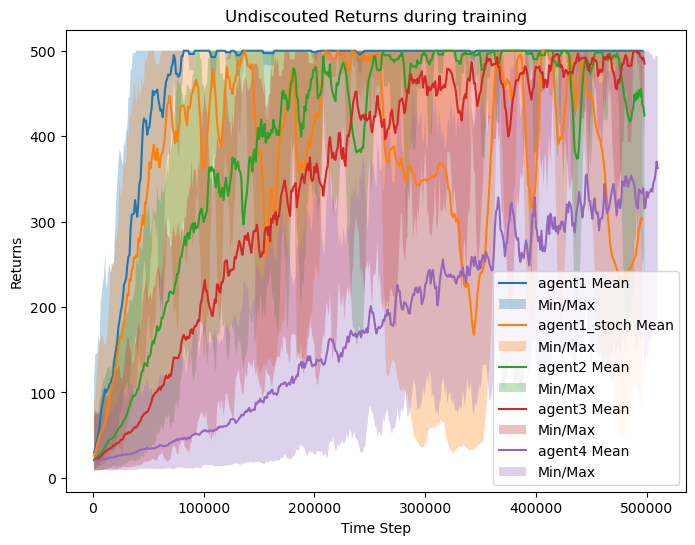

In [15]:
plt.figure(figsize=(8,6))
for k,v in disc_agents_dicts.items():
    mean = np.convolve(v["mean_log_returns_all"], np.ones(5)/5, mode='valid')
    min = np.convolve(v["min_log_returns_all"], np.ones(5)/5, mode='valid')
    max = np.convolve(v["max_log_returns_all"], np.ones(5)/5, mode='valid')
    range_step = 1000
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns during training')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')
    plt.legend(prop={'size': 10})

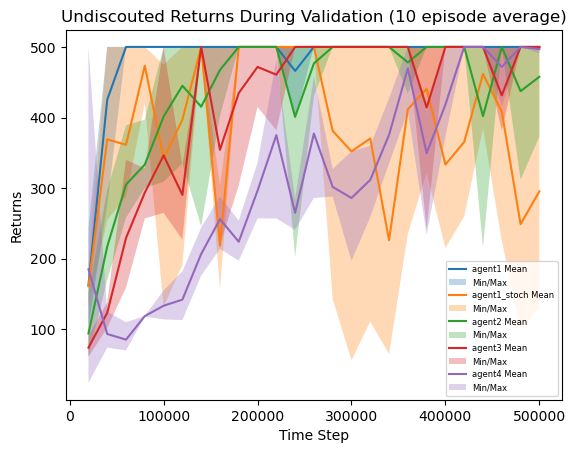

In [20]:
for k,v in disc_agents_dicts.items():
    mean = np.mean(np.array(v['eval_return_history_all']), axis=0)
    min = np.min(np.array(v['eval_return_history_all']), axis=0)
    max = np.max(np.array(v['eval_return_history_all']), axis=0)

    range_step = 20000
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns During Validation (10 episode average)')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')
    plt.legend(prop={'size': 6})

### Continous

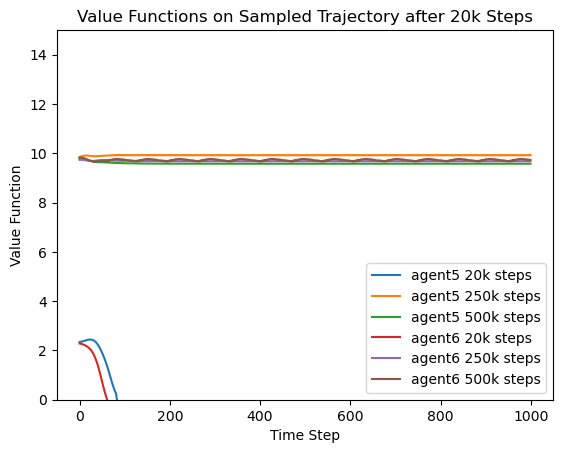

In [23]:
steps = ["20k", "250k", '', "500k"] 
for k,v in cont_agents_dicts.items():
    for i in [0,1,3]:
        
        trajectory = v["value_funcs_20_100_500"][i]
        plt.plot(trajectory, label = k + " " + steps[i] + " steps")
        plt.legend()
        plt.ylim(0, 15)
        plt.xlabel('Time Step')
        plt.ylabel('Value Function')
        plt.title('Value Functions on Sampled Trajectory after 20k Steps')

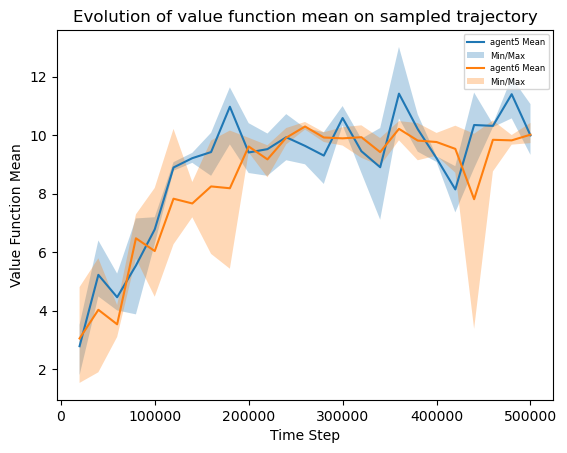

In [24]:
for k,v in cont_agents_dicts.items():
    mean = np.mean(np.array(v['value_trajectories_mean_all']), axis=0)
    min = np.min(np.array(v['value_trajectories_mean_all']), axis=0)
    max = np.max(np.array(v['value_trajectories_mean_all']), axis=0)

    range_step = 20000
    plt.xlabel('Time Step')
    plt.ylabel('Value Function Mean')
    plt.title('Evolution of value function mean on sampled trajectory')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')
    plt.legend(prop={'size': 6})

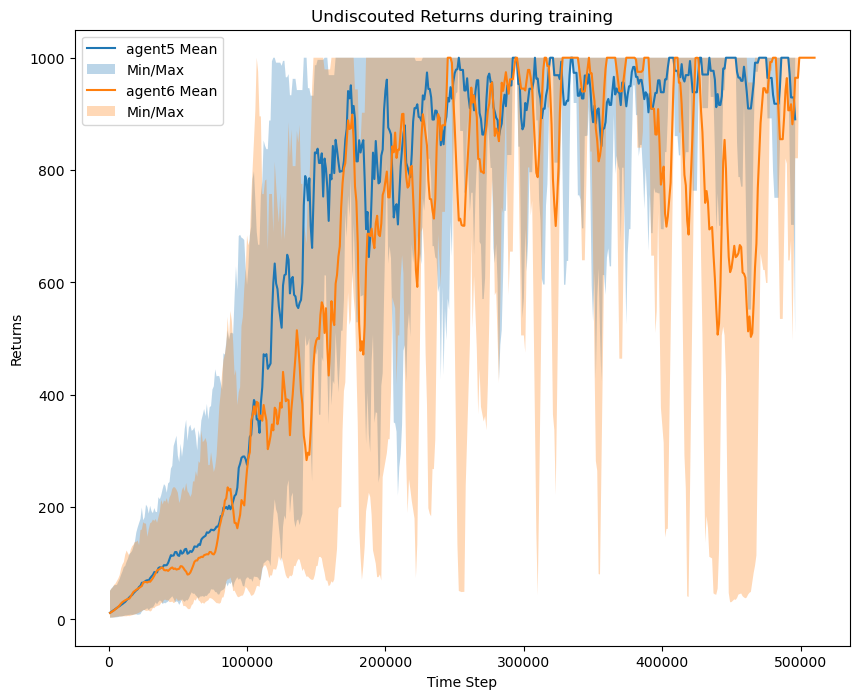

In [16]:
plt.figure(figsize=(10,8))
for k,v in cont_agents_dicts.items():
    mean = np.convolve(v["mean_log_returns_all"], np.ones(5)/5, mode='valid')
    min = np.convolve(v["min_log_returns_all"], np.ones(5)/5, mode='valid')
    max = np.convolve(v["max_log_returns_all"], np.ones(5)/5, mode='valid')
    range_step = 1000
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns during training')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')
    plt.legend(prop={'size': 10})

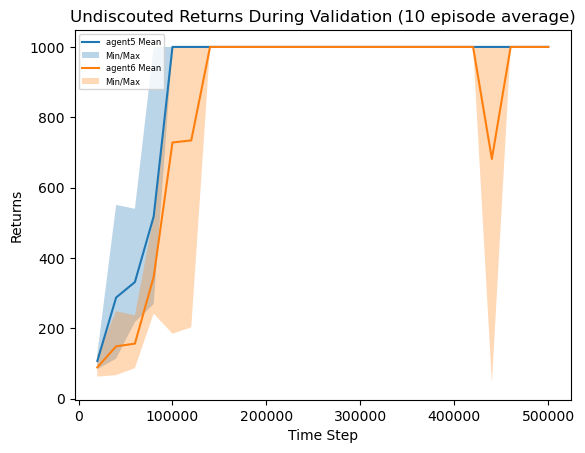

In [27]:
for k,v in cont_agents_dicts.items():
    mean = np.mean(np.array(v['eval_return_history_all']), axis=0)
    min = np.min(np.array(v['eval_return_history_all']), axis=0)
    max = np.max(np.array(v['eval_return_history_all']), axis=0)

    range_step = 20000
    plt.xlabel('Time Step')
    plt.ylabel('Returns')
    plt.title('Undiscouted Returns During Validation (10 episode average)')
    plt.plot(range(range_step,range_step*len(mean) + range_step, range_step), mean, label= k + ' Mean')
    plt.fill_between(range(range_step,range_step*len(mean) + range_step, range_step), min, max, alpha=0.3, label='Min/Max')
    plt.legend(prop={'size': 6})